https://www.learnpytorch.io/02_pytorch_classification/

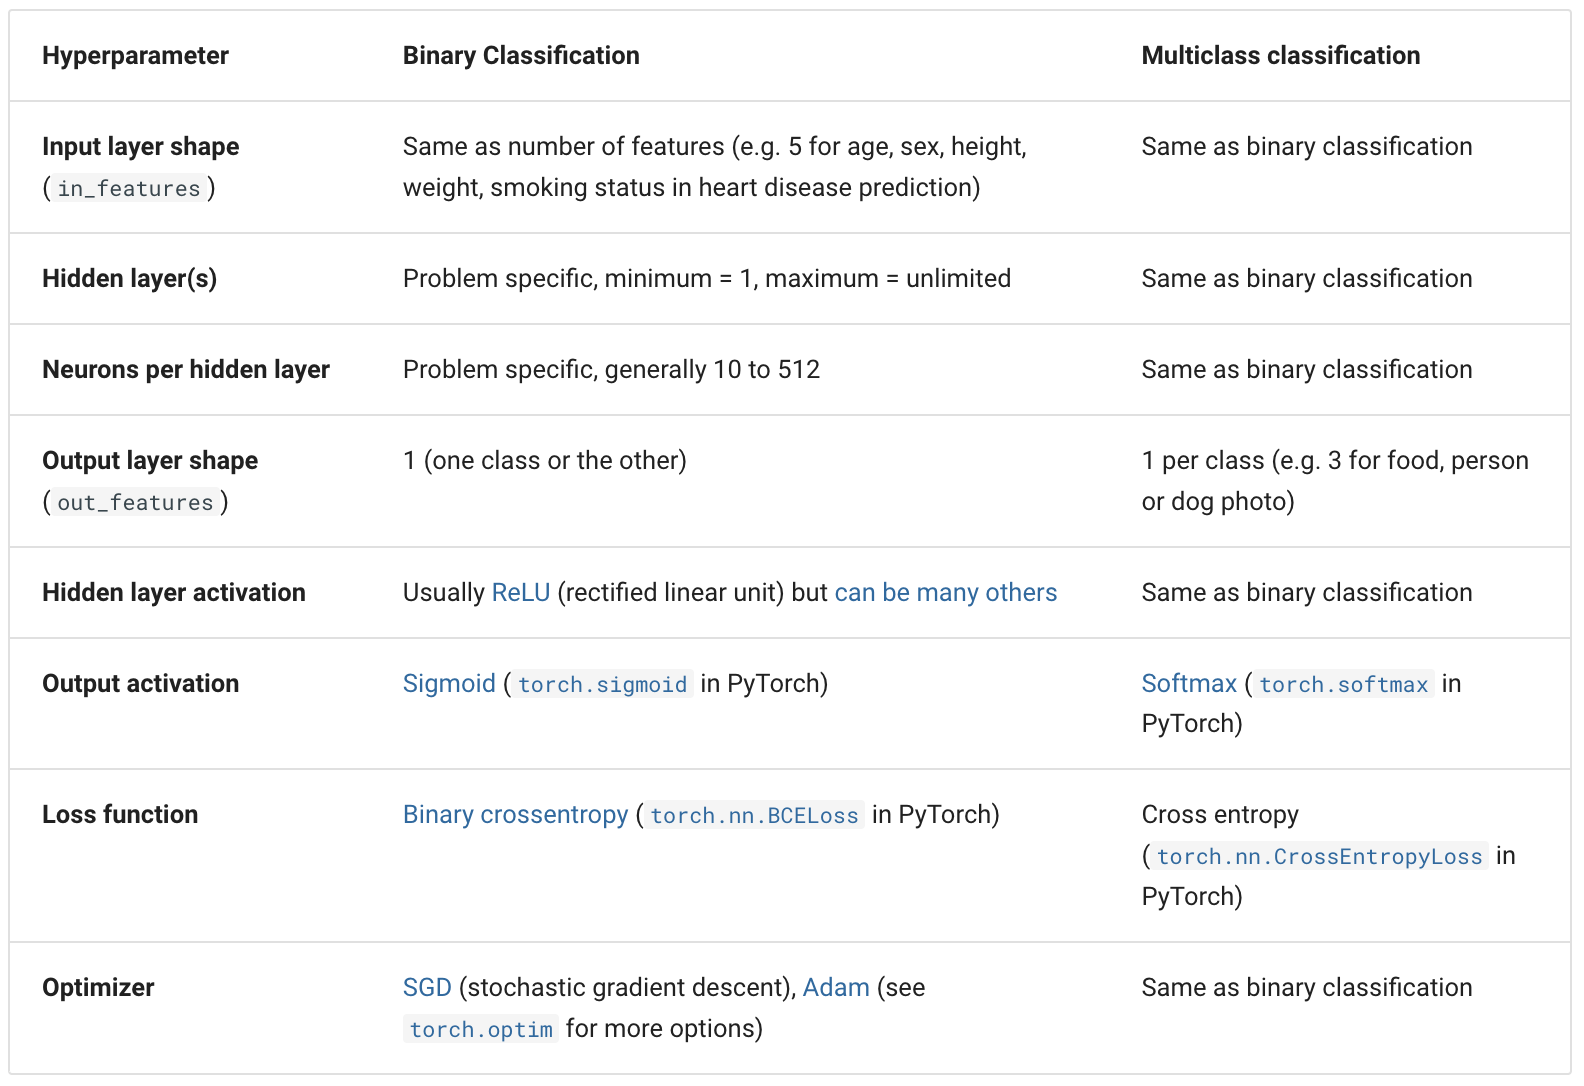

# Make classification data and get it ready

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=123)

print(f"First 10 of x:\n{x[:10]}")
print(f"First 10 of y:\n{y[:10]}")

First 10 of x:
[[-0.07903747  1.02380474]
 [-0.83268459  0.55400603]
 [ 0.80536475  0.53489832]
 [ 0.42014501  0.6805624 ]
 [-0.12995119  0.98457024]
 [-0.03823615  0.80720463]
 [-0.56007585 -0.82380805]
 [ 0.8381019  -0.47052305]
 [ 0.51353937 -0.61382559]
 [ 0.93583093 -0.24567093]]
First 10 of y:
[0 0 0 1 0 1 0 0 1 0]


In [2]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"x1":x[:,0],
                        "x2":x[:,1],
                       "label":y})

circles.head(10)


,x1,x2,label
0,-0.079037,1.023805,0
1,-0.832685,0.554006,0
2,0.805365,0.534898,0
3,0.420145,0.680562,1
4,-0.129951,0.984570,0
5,-0.038236,0.807205,1
6,-0.560076,-0.823808,0
7,0.838102,-0.470523,0
8,0.513539,-0.613826,1
9,0.935831,-0.245671,0


In [3]:
circles["label"].value_counts()

0    500
1    500
Name: label, dtype: int64

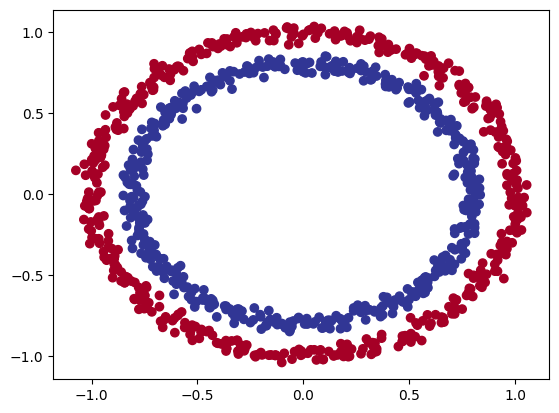

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=circles["x1"],
           y=circles["x2"],
           c=circles["label"],
           cmap=plt.cm.RdYlBu)

## Turn data into tensors and create train and test splits

In [5]:
x.shape, y.shape

((1000, 2), (1000,))

In [6]:
circles.head()

,x1,x2,label
0,-0.079037,1.023805,0
1,-0.832685,0.554006,0
2,0.805365,0.534898,0
3,0.420145,0.680562,1
4,-0.129951,0.984570,0


In [7]:
circles[["x1","x2"]].to_numpy()

array([[-0.07903747,  1.02380474],
       [-0.83268459,  0.55400603],
       [ 0.80536475,  0.53489832],
       ...,
       [ 0.14608868, -0.99446784],
       [-0.12956975, -0.99445774],
       [ 0.71345705,  0.12121129]])

In [8]:
import torch

x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

x[:5], y[:5]

(tensor([[-0.0790,  1.0238],
         [-0.8327,  0.5540],
         [ 0.8054,  0.5349],
         [ 0.4201,  0.6806],
         [-0.1300,  0.9846]]),
 tensor([0., 0., 0., 1., 0.]))

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123)

x_train[0:10], y_train[0:10]

(tensor([[ 0.7149, -0.7400],
         [ 0.0748, -0.7606],
         [ 0.1461, -0.9945],
         [-0.7351, -0.1578],
         [ 0.9209,  0.2904],
         [ 0.2920, -0.6898],
         [ 0.7807, -0.0329],
         [-0.6617, -0.4827],
         [ 0.6353, -0.4489],
         [-0.1417,  0.7986]]),
 tensor([0., 1., 0., 1., 0., 1., 1., 1., 1., 1.]))

In [14]:
len(x_train), len(x_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# Building a model

In [15]:
from torch import nn

device="mps" if torch.backends.mps.is_available() else "cpu"
device

'mps'

In [16]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling x and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
        
        # 3. Define a forward method containing the forward pass computation
        def forward(self, x):
            # Return the output of layer_2, a single feature, the same shape as y
            return self.layer_2(self.layer_1(x)) # computation goes thtough layer_1 first then the output of layer_1 goes through layer_2
        
# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
# Make predictions with the model
untrained_preds = model_0(x_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.1603],
        [ 0.0727],
        [ 0.3052],
        [ 0.0842],
        [-0.0421],
        [ 0.4197],
        [ 0.3859],
        [ 0.1046],
        [ 0.3803],
        [ 0.0634]], device='mps:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([0., 1., 0., 1., 1., 0., 0., 1., 1., 0.])


/Users/pataweeratanaruengwatna/opt/anaconda3/envs/pytorch-resource/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(
